<a href="https://www.kaggle.com/code/masoudnaghshbandi/microsoft-stock-rnn?scriptVersionId=109395259" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

## Import libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [5]:
ms=yf.download('MSFT',
           start='2012-01-01',
           end='2021-12-31',
           progress=False)
df=ms[['Adj Close','Open','Close','High','Low']].round(3)
df

,Adj Close,Open,Close,High,Low
Date,,,,,
2012-01-03,21.527,26.55,26.77,26.96,26.39
2012-01-04,22.034,26.82,27.40,27.47,26.78
2012-01-05,22.259,27.38,27.68,27.73,27.29
2012-01-06,22.605,27.53,28.11,28.19,27.53
2012-01-09,22.307,28.05,27.74,28.10,27.72
...,...,...,...,...,...
2021-12-23,332.517,332.75,334.69,336.39,332.73
2021-12-27,340.227,335.46,342.45,342.48,335.43
2021-12-28,339.035,343.15,341.25,343.81,340.32


<AxesSubplot:xlabel='Date'>

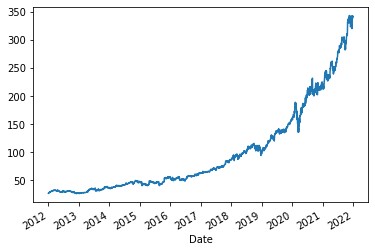

In [6]:
df.Close.plot()

In [7]:
df[:'2020'].Close.values.reshape(-1,1)

array([[ 26.77],
       [ 27.4 ],
       [ 27.68],
       ...,
       [224.15],
       [221.68],
       [222.42]])

In [8]:
df['2021':].Close.values.reshape(-1,1)

array([[217.69],
       [217.9 ],
       [212.25],
       [218.29],
       [219.62],
       [217.49],
       [214.93],
       [216.34],
       [213.02],
       [212.65],
       [216.44],
       [224.34],
       [224.97],
       [225.95],
       [229.53],
       [232.33],
       [232.9 ],
       [238.93],
       [231.96],
       [239.65],
       [239.51],
       [243.  ],
       [242.01],
       [242.2 ],
       [242.47],
       [243.77],
       [242.82],
       [244.49],
       [244.99],
       [243.7 ],
       [244.2 ],
       [243.79],
       [240.97],
       [234.51],
       [233.27],
       [234.55],
       [228.99],
       [232.38],
       [236.94],
       [233.87],
       [227.56],
       [226.73],
       [231.6 ],
       [227.39],
       [233.78],
       [232.42],
       [237.13],
       [235.75],
       [234.81],
       [237.71],
       [237.04],
       [230.72],
       [230.35],
       [235.99],
       [237.58],
       [235.46],
       [232.34],
       [236.48],
       [235.24

In [9]:
train_df=df[:'2020'].Close.values.reshape(-1,1)
test_df=df['2021':].Close.values.reshape(-1,1)


X_train=[]
y_train=[]
y_steps=5
X_steps=10

for i in range(X_steps,len(train_df)- y_steps+1):
        X_train.append(train_df[i-X_steps:i,0])
        y_train.append(train_df[i:i+y_steps,0])

In [10]:
train_df[-8:,0]

array([222.59, 223.94, 221.02, 222.75, 224.96, 224.15, 221.68, 222.42])

In [11]:
X_train[-1]

array([210.52, 213.26, 214.2 , 214.13, 219.28, 219.42, 218.59, 222.59,
       223.94, 221.02])

In [12]:
y_train[-1]

array([222.75, 224.96, 224.15, 221.68, 222.42])

## Creat trai test data

In [13]:
def ts_data(df, X_steps,y_steps):
    train_df=df[:'2020'].Close.values.reshape(-1,1)
    test_df=df['2021':].Close.values.reshape(-1,1)
    
    sc=MinMaxScaler(feature_range=(0,1))
    train_df_scaled=sc.fit_transform(train_df)
    X_train=[]
    y_train=[]
    for i in range(X_steps,len(train_df_scaled)- y_steps+1):
        X_train.append(train_df_scaled[i-X_steps:i,0])
        y_train.append(train_df_scaled[i:i+y_steps,0])
    X_train=np.array(X_train)   
    y_train=np.array(y_train)
    X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))

    X=df.Close.values
    X=X[len(X)-len(test_df)-X_steps:]
    X=X.reshape(-1,1)
    X=sc.transform(X)
    X_test=[]
    y_test=[]
    for i in range(X_steps,len(test_df)+X_steps- y_steps+1):
        X_test.append(X[i-X_steps:i,0])
        y_test.append(X[i:i+y_steps,0])
    X_test=np.array(X_test)   
    X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],1))
    y_test=np.array(y_test)


    return X_train,y_train,X_test,y_test, sc


In [14]:
X_train,y_train, X_test, y_test,sc=ts_data(df,7,2)


In [15]:
X_train.shape

(2257, 7, 1)

In [16]:
y_train.shape

(2257, 2)

In [17]:
X_test.shape

(250, 7, 1)

In [18]:
y_test.shape

(250, 2)

In [19]:
y_train

array([[0.00794037, 0.00915822],
       [0.00915822, 0.00920694],
       [0.00920694, 0.0090608 ],
       ...,
       [0.96741037, 0.96346454],
       [0.96346454, 0.95143219],
       [0.95143219, 0.95503702]])

## Simple Rnn Model

In [20]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

In [21]:
simple_rnn_model=Sequential([SimpleRNN(50,return_sequences=True),
                            SimpleRNN(50),
                            Dense(2)])

2022-10-28 14:03:10.380421: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
simple_rnn_model.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
simple_rnn_model.fit(X_train,y_train,epochs=100,validation_split=0.15)

2022-10-28 14:03:10.573767: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
60/60 [==============================] - 3s 15ms/step - loss: 0.0190 - val_loss: 0.0352
Epoch 2/100
60/60 [==============================] - 0s 8ms/step - loss: 2.2191e-04 - val_loss: 0.0255
Epoch 3/100
60/60 [==============================] - 1s 8ms/step - loss: 1.5378e-04 - val_loss: 0.0245
Epoch 4/100
60/60 [==============================] - 0s 8ms/step - loss: 1.3784e-04 - val_loss: 0.0186
Epoch 5/100
60/60 [==============================] - 1s 8ms/step - loss: 1.1877e-04 - val_loss: 0.0141
Epoch 6/100
60/60 [==============================] - 0s 8ms/step - loss: 1.2649e-04 - val_loss: 0.0109
Epoch 7/100
60/60 [==============================] - 1s 9ms/step - loss: 9.6864e-05 - val_loss: 0.0079
Epoch 8/100
60/60 [==============================] - 0s 8ms/step - loss: 1.0496e-04 - val_loss: 0.0080
Epoch 9/100
60/60 [==============================] - 0s 8ms/step - loss: 9.8700e-05 - val_loss: 0.0068
Epoch 10/100
60/60 [==============================] - 0s 8ms/step - loss: 8.

In [24]:
simple_rnn_pred=simple_rnn_model.predict(X_test)


# Plot learning plot 

In [25]:
def prediction_plot(predictions):
    fig, ax=plt.subplots()
    ax.plot(df['2021':].index[:len(y_test)],sc.inverse_transform(y_test[:,0].reshape(-1,1))
            , label="Real")
    ax.plot(df['2021':].index[:len(y_test)],
            sc.inverse_transform(predictions[:,0].reshape(-1,1)), label="predeiction")

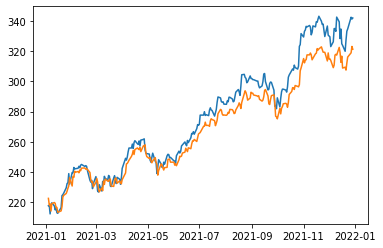

In [26]:
prediction_plot(simple_rnn_pred)